<a href="https://colab.research.google.com/github/DmsAnhr/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Praktikum**

In [ ]:
from google.colab import drive
drive.mount( '/content/drive')

In [2]:
import cv2 as cv
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


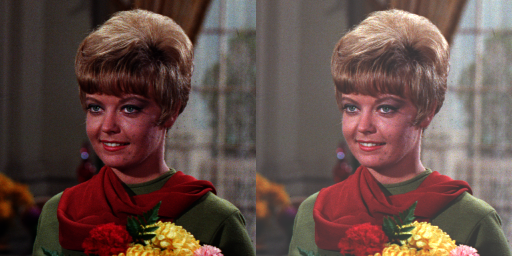

In [3]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Erro, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.png')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simpel tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### **TUGAS**

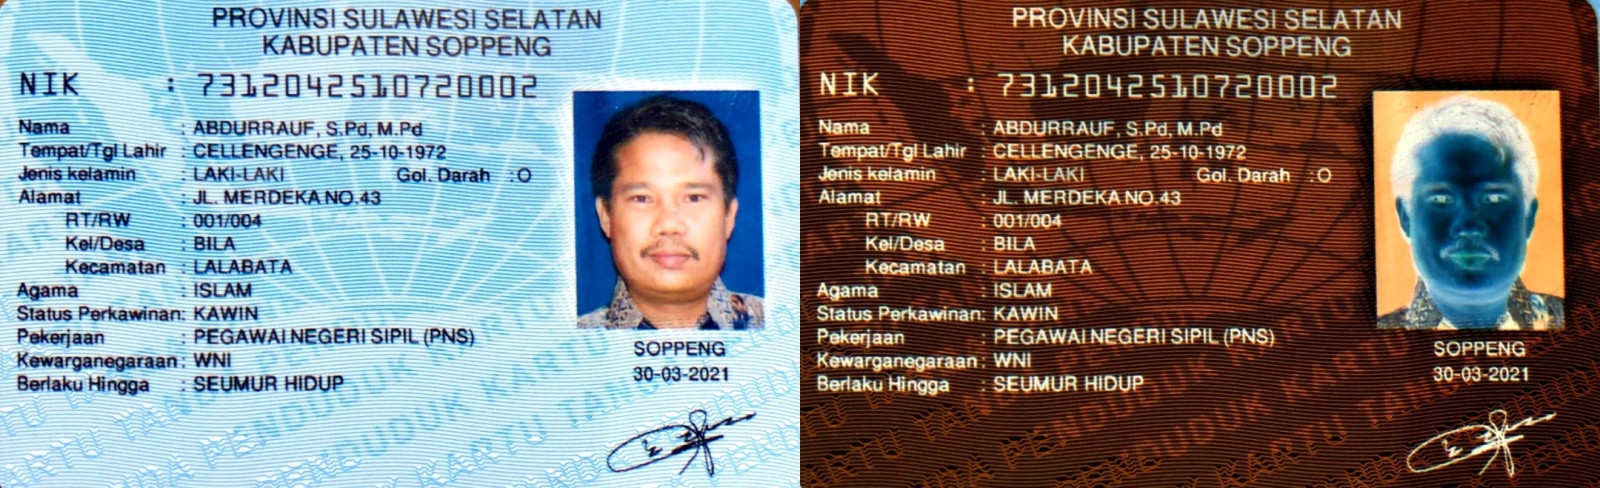

In [8]:
#Tugas 1
ktp_ori = cv.imread('/content/drive/MyDrive/PCVK/Salinan KTP.jpeg')
ktp_invers = np.zeros(ktp_ori.shape, ktp_ori.dtype)

for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    for c in range(ktp_ori.shape[2]):
      ktp_invers[y,x,c] = np.clip(255-ktp_ori[y,x,c] + 0, 0, 255)

#cara simple
# ktp_invers = 255 - ktp_ori

final_frame = cv.hconcat((ktp_ori, ktp_invers))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


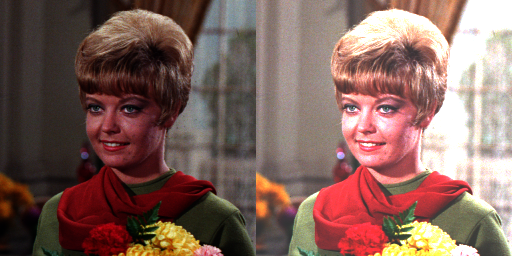

In [10]:
#Tugas 2
print("Mengubah kontras dan tingkat kecerahan citra")
print("--------------------------------------------")

brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

ori_image = cv.imread('/content/drive/MyDrive/PCVK/female.png')
bright_image = np.zeros(ori_image.shape, ori_image.dtype)

brightness = max(-255, min(255, brightness))
contrast = max(1.0, min(3.0, contrast))

for y in range(ori_image.shape[0]):
    for x in range(ori_image.shape[1]):
        for c in range(ori_image.shape[2]):
            pixel_value = ori_image[y, x, c]
            new_pixel_value = int(contrast * pixel_value + brightness)
            new_pixel_value = max(0, min(255, new_pixel_value))
            bright_image[y, x, c] = new_pixel_value

final_frame = cv.hconcat((ori_image, bright_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi log
-------------------------------------------------------
Masukkan tingkat kecerahan: 45


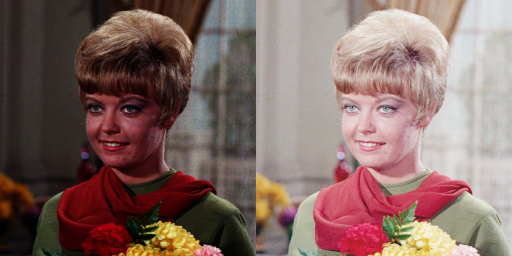

In [18]:
#Tugas 3
print("Mengubah tingkat kecerahan citra dengan transformasi log")
print("-------------------------------------------------------")

brightness = int(input("Masukkan tingkat kecerahan: "))

ori_image = cv.imread('/content/drive/MyDrive/PCVK/female.png')
log_image = np.zeros(ori_image.shape, ori_image.dtype)

brightness = max(-255, min(255, brightness))

for y in range(ori_image.shape[0]):
    for x in range(ori_image.shape[1]):
        for c in range(ori_image.shape[2]):
            pixel_value = ori_image[y, x, c]
            log_image[y, x, c] = int(brightness * np.log(1 + pixel_value))

final_frame = np.hstack((ori_image, log_image))
cv2_imshow(final_frame)

<ipython-input-30-404aa03fb0c4>:17: RuntimeWarning: overflow encountered in ubyte_scalars
  lightness_image[y, x, c] = (np.max(pixel_value) + np.min(pixel_value)) // 2


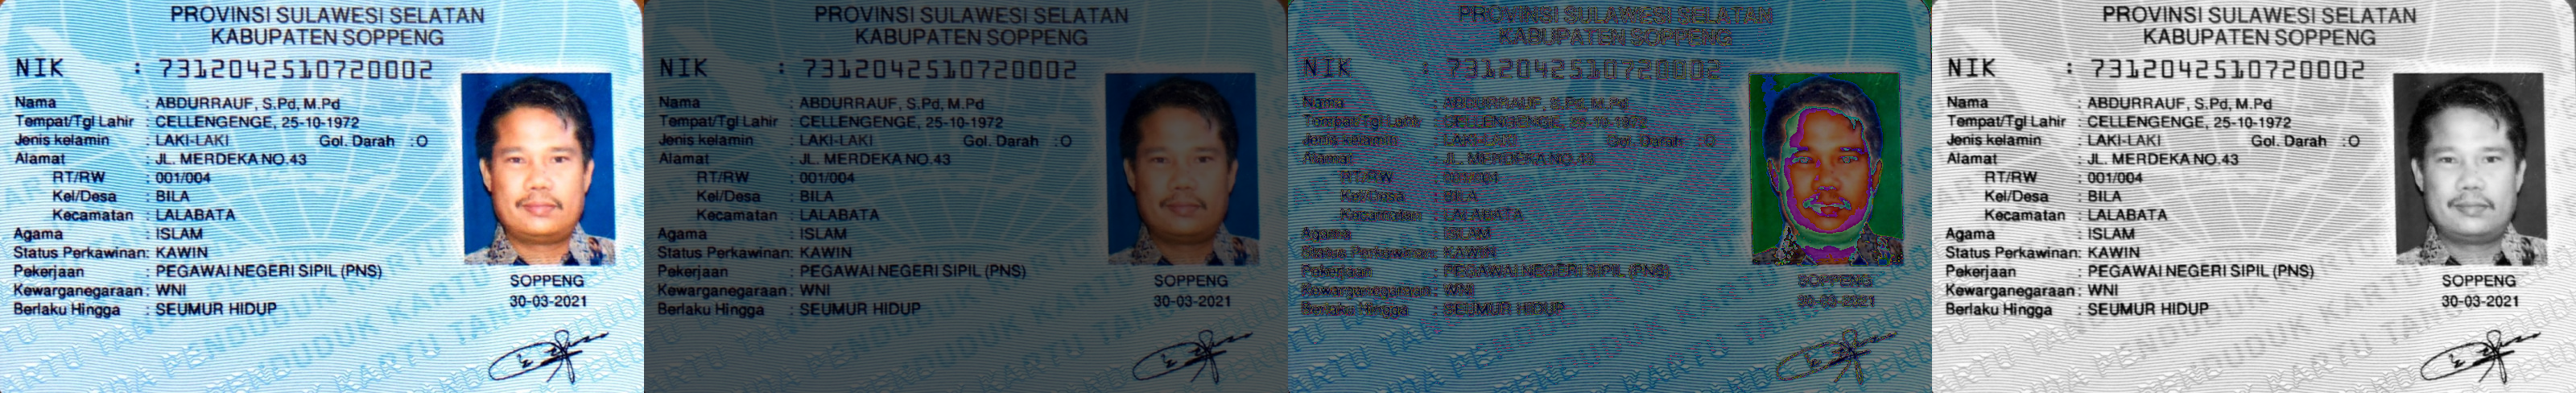

In [30]:
#Tugas 4
image = cv.imread('/content/drive/MyDrive/PCVK/Salinan KTP.jpeg')

averaging_image = np.zeros(image.shape, image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            pixel_value = image[y, x, c]
            averaging_image[y, x, c] = np.sum(pixel_value) // 3


lightness_image = np.zeros(image.shape, image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            pixel_value = image[y, x, c]
            lightness_image[y, x, c] = (np.max(pixel_value) + np.min(pixel_value)) // 2


luminance_image = np.zeros(image.shape, image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel_value = image[y, x]
        luminance_value = 0.21 * pixel_value[2] + 0.72 * pixel_value[1] + 0.07 * pixel_value[0]
        luminance_image[y, x] = [luminance_value, luminance_value, luminance_value]


final_frame = np.hstack((image, averaging_image, lightness_image, luminance_image))
cv2_imshow(final_frame)


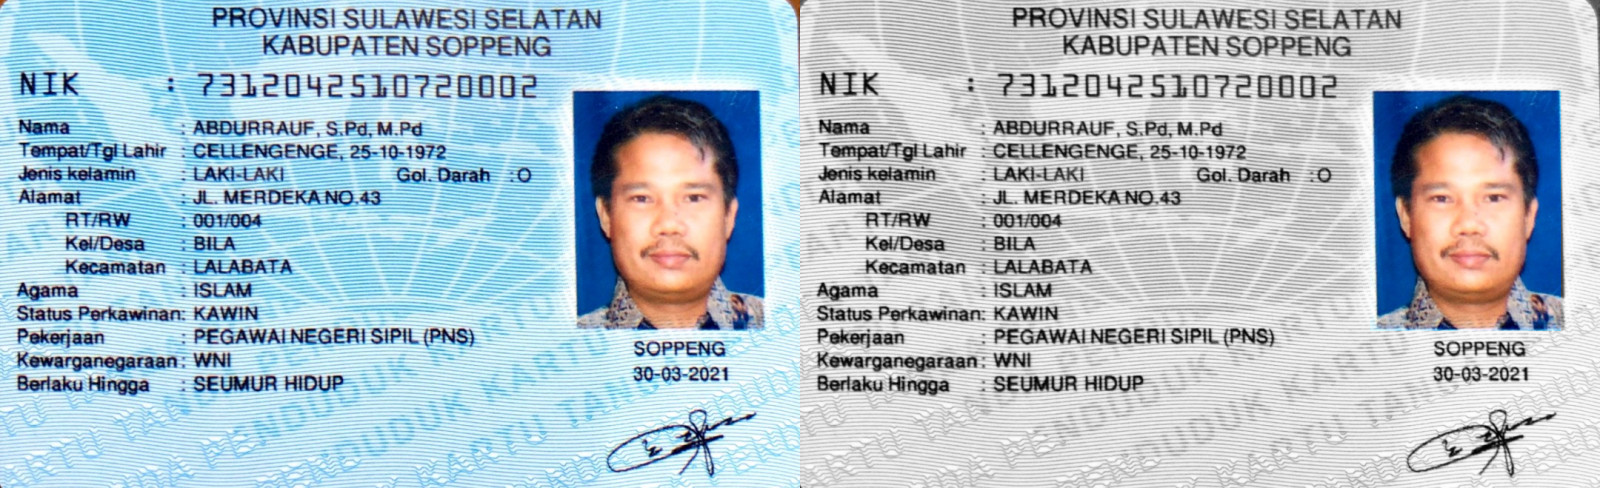

In [91]:
image_ktp = cv.imread('/content/drive/MyDrive/PCVK/Salinan KTP.jpeg')

x1, y1 = 570, 90
x2, y2 = 760, 330

#menggunakan formula luminance
grayscale_image = np.zeros(image_ktp.shape, image_ktp.dtype)
for y in range(image_ktp.shape[0]):
    for x in range(image_ktp.shape[1]):
        pixel_value = image_ktp[y, x]

        # Cek piksel area yang dipertahankan
        if x1 <= x <= x2 and y1 <= y <= y2:
            grayscale_image[y, x] = pixel_value
        else:
            luminance_value = 0.21 * pixel_value[2] + 0.72 * pixel_value[1] + 0.07 * pixel_value[0]
            grayscale_image[y, x] = [luminance_value, luminance_value, luminance_value]

grayscale_image = np.array(grayscale_image, dtype=np.uint8)

final_result = np.hstack((image_ktp, grayscale_image))
cv2_imshow(final_result)